In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
        

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/siim-isic-melanoma-classification/sample_submission.csv
/kaggle/input/siim-isic-melanoma-classification/tfrecords/train02-2071.tfrec
/kaggle/input/siim-isic-melanoma-classification/test/ISIC_3024297.dcm
/kaggle/input/siim-isic-melanoma-classification/jpeg/test/ISIC_3464219.jpg
/kaggle/input/siim-isic-melanoma-classification/jpeg/train/ISIC_4232172.jpg
/kaggle/input/siim-isic-melanoma-classification/train/ISIC_2370610.dcm


In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
trainpath = '/kaggle/input/siim-isic-melanoma-classification/train.csv'
traindf = pd.read_csv(trainpath)

In [5]:
traindf.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [6]:
traindf['age_approx'].describe()

count    33058.000000
mean        48.870016
std         14.380360
min          0.000000
25%         40.000000
50%         50.000000
75%         60.000000
max         90.000000
Name: age_approx, dtype: float64

In [7]:
JPEG_PATH = '/kaggle/input/siim-isic-melanoma-classification/jpeg/'
DICOM_PATH = '/kaggle/input/siim-isic-melanoma-classification/'

Text(0, 0.5, 'Images')

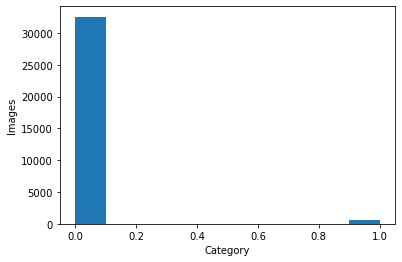

In [8]:
traindf['target'].plot(kind='hist')
plt.xlabel("Category")
plt.ylabel("Images")

In [9]:
traindf['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [10]:
traindf['benign_malignant'].value_counts()

benign       32542
malignant      584
Name: benign_malignant, dtype: int64

In [11]:
malignDF = traindf[traindf['target'] == 1]
malignDF.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
91,ISIC_0149568,IP_0962375,female,55.0,upper extremity,melanoma,malignant,1
235,ISIC_0188432,IP_0135517,female,50.0,upper extremity,melanoma,malignant,1
314,ISIC_0207268,IP_7735373,male,55.0,torso,melanoma,malignant,1
399,ISIC_0232101,IP_8349964,male,65.0,torso,melanoma,malignant,1
459,ISIC_0247330,IP_3232631,female,65.0,lower extremity,melanoma,malignant,1


In [12]:
import pydicom as dicom
import imageio
import matplotlib.pylab as plt


malignImagPath = os.path.join(DICOM_PATH+'train/', 'ISIC_0149568.dcm')
malignImagPath2 = os.path.join(DICOM_PATH+'train/', 'ISIC_0188432.dcm')
malignImagPath3 = os.path.join(DICOM_PATH+'train/', 'ISIC_0207268.dcm')
malignImagPath4 = os.path.join(DICOM_PATH+'train/', 'ISIC_0247330.dcm')

ds = dicom.dcmread(malignImagPath)
ds2 = dicom.dcmread(malignImagPath2)
ds3 = dicom.dcmread(malignImagPath3)
ds4 = dicom.dcmread(malignImagPath4)



In [13]:

benignImagPath = os.path.join(DICOM_PATH+'train/', 'ISIC_2637011.dcm')
benignImagPath2 = os.path.join(DICOM_PATH+'train/', 'ISIC_0015719.dcm')
benignImagPath3 = os.path.join(DICOM_PATH+'train/', 'ISIC_0068279.dcm')
benignImagPath4 = os.path.join(DICOM_PATH+'train/', 'ISIC_0074268.dcm')

bs = dicom.dcmread(benignImagPath)
bs2 = dicom.dcmread(benignImagPath2)
bs3 = dicom.dcmread(benignImagPath3)
bs4 = dicom.dcmread(benignImagPath4)

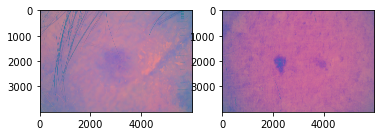

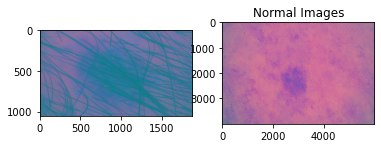

In [15]:

f, (plot1, plot2 ) = plt.subplots(1, 2)
plot1.imshow(bs.pixel_array)
plot2.imshow(bs2.pixel_array)


f, (plot1, plot2 ) = plt.subplots(1, 2)
plot1.imshow(bs3.pixel_array)
plot2.imshow(bs4.pixel_array)
plt.title('Normal Images')
plt.show()

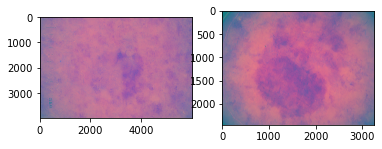

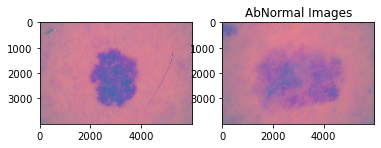

In [17]:

f, (plot1, plot2 ) = plt.subplots(1, 2)
plot1.imshow(ds.pixel_array)
plot2.imshow(ds2.pixel_array)


f, (plot1, plot2 ) = plt.subplots(1, 2)
plot1.imshow(ds3.pixel_array)
plot2.imshow(ds4.pixel_array)
plt.title('AbNormal Images')
plt.show()

In [18]:
ds.pixel_array.shape

(4000, 6000, 3)

In [20]:
ds.pixel_array.min()

4

In [21]:
ds.pixel_array.max()

255

Lets visualize it into RGB

In [33]:
from pydicom.pixel_data_handlers.util import convert_color_space 

In [37]:
rgbNormal = convert_color_space(bs.pixel_array, 'YBR_FULL_422', 'RGB')
rgbNormal2 = convert_color_space(bs2.pixel_array, 'YBR_FULL_422', 'RGB')
rgbNormal3 = convert_color_space(bs3.pixel_array, 'YBR_FULL_422', 'RGB')
rgbNormal4 = convert_color_space(bs4.pixel_array, 'YBR_FULL_422', 'RGB')

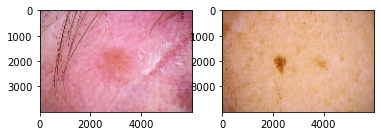

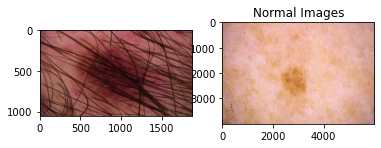

In [38]:
f, (plot1, plot2 ) = plt.subplots(1, 2)
plot1.imshow(rgbNormal)
plot2.imshow(rgbNormal2)


f, (plot1, plot2 ) = plt.subplots(1, 2)
plot1.imshow(rgbNormal3)
plot2.imshow(rgbNormal4)
plt.title('Normal Images')
plt.show()

In [39]:
rgbAbNormal = convert_color_space(ds.pixel_array, 'YBR_FULL_422', 'RGB')
rgbAbNormal2 = convert_color_space(ds2.pixel_array, 'YBR_FULL_422', 'RGB')
rgbAbNormal3 = convert_color_space(ds3.pixel_array, 'YBR_FULL_422', 'RGB')
rgbAbNormal4 = convert_color_space(ds4.pixel_array, 'YBR_FULL_422', 'RGB')

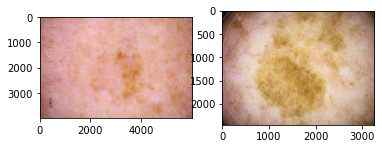

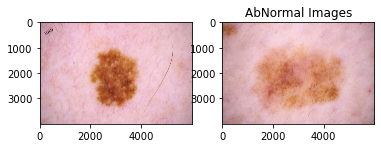

In [41]:
f, (plot1, plot2 ) = plt.subplots(1, 2)
plot1.imshow(rgbAbNormal)
plot2.imshow(rgbAbNormal2)


f, (plot1, plot2 ) = plt.subplots(1, 2)
plot1.imshow(rgbAbNormal3)
plot2.imshow(rgbAbNormal4)
plt.title('AbNormal Images')
plt.show()

In [45]:
orig_normal = [bs.pixel_array, bs2.pixel_array, bs3.pixel_array, bs4.pixel_array]
orig_abnormal = [ds.pixel_array, ds2.pixel_array, ds3.pixel_array, ds4.pixel_array]
rgbnormal_list = [rgbNormal, rgbNormal2, rgbNormal3, rgbNormal4]
rgbabnormal_list = [rgbAbNormal, rgbAbNormal2, rgbAbNormal3, rgbAbNormal4]

Coverting RGB into gray

In [49]:
gray_normal = list(map(lambda image: cv2.cvtColor(image,cv2.COLOR_RGB2GRAY), rgbnormal_list))
gray_abnormal = list(map(lambda image: cv2.cvtColor(image,cv2.COLOR_RGB2GRAY), rgbabnormal_list))


Text(0.5, 1.0, 'Normal Images')

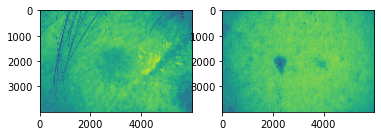

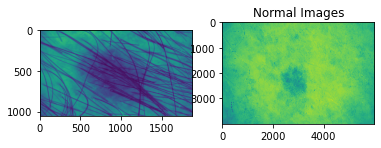

In [55]:
f, (plot1, plot2 ) = plt.subplots(1, 2)
plot1.imshow(gray_normal[0])
plot2.imshow(gray_normal[1])

f, (plot1, plot2 ) = plt.subplots(1, 2)
plot1.imshow(gray_normal[2])
plot2.imshow(gray_normal[3])
plt.title('Normal Images')

Text(0.5, 1.0, 'AbNormal Images')

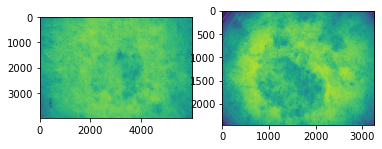

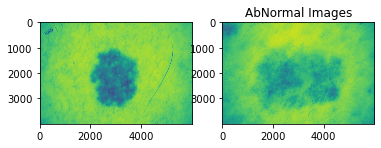

In [56]:
f, (plot1, plot2 ) = plt.subplots(1, 2)
plot1.imshow(gray_abnormal[0])
plot2.imshow(gray_abnormal[1])

f, (plot1, plot2 ) = plt.subplots(1, 2)
plot1.imshow(gray_abnormal[2])
plot2.imshow(gray_abnormal[3])
plt.title('AbNormal Images')

### Histograms

- Histograms: count number of pixels at each intensity value.
- Implemented in scipy.ndimage 
  - higher-dimensional arrays 
  - masked data
- Advanced techniques and functionality in scikit-image

Plotting the **histogram** of normal/abnormal images****

In [43]:
import scipy.ndimage as ndi


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses th

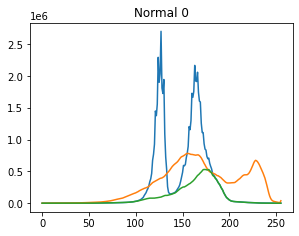

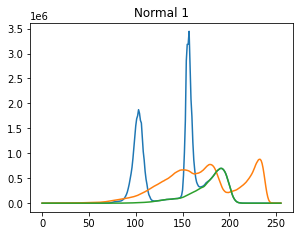

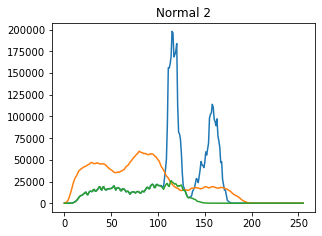

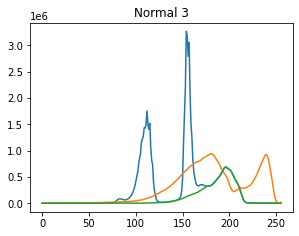

In [62]:
columns = 3
# rows = len(os.listdir(DATA)) - 10
rows = 4
for i in range(len(rgbnormal_list)):    
    #histograms
    hist_original = ndi.histogram(orig_normal[i], min=0, max=255, bins=256)
    hist_rgb = ndi.histogram(rgbnormal_list[i], min=0, max=255, bins=256)
    hist_gray = ndi.histogram(gray_normal[i], min=0, max=255, bins=256)
    
    
    fig=plt.figure(figsize=(16, 16))
    fig.add_subplot(rows, columns, i+1)    
    plt.plot(hist_original)
    
    fig.add_subplot(rows, columns, i+1)   
    plt.plot(hist_rgb)
    
    fig.add_subplot(rows, columns, i+1)  
    plt.plot(hist_gray)
    plt.title("Normal "+str(i))

plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses th

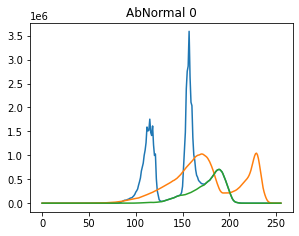

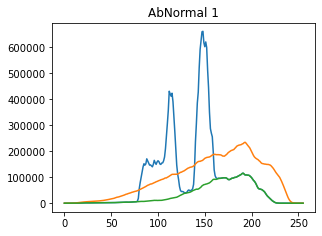

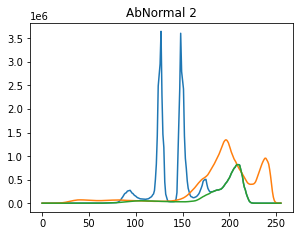

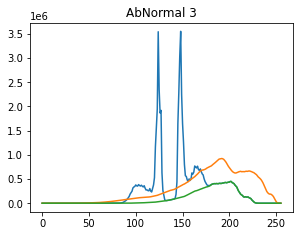

In [63]:
columns = 3
# rows = len(os.listdir(DATA)) - 10
rows = 4
for i in range(len(rgbabnormal_list)):    
    #histograms
    hist_original = ndi.histogram(orig_abnormal[i], min=0, max=255, bins=256)
    hist_rgb = ndi.histogram(rgbabnormal_list[i], min=0, max=255, bins=256)
    hist_gray = ndi.histogram(gray_abnormal[i], min=0, max=255, bins=256)
    
    
    fig=plt.figure(figsize=(16, 16))
    fig.add_subplot(rows, columns, i+1)    
    plt.plot(hist_original)
    
    fig.add_subplot(rows, columns, i+1)   
    plt.plot(hist_rgb)
    
    fig.add_subplot(rows, columns, i+1)  
    plt.plot(hist_gray)
    plt.title("AbNormal "+str(i))

plt.show()


### Equalization

- Distributions often skewed toward low intensities (background values).
- **Equalization**: redistribute values to optimize full intensity range
- **Cumulative distribution function**: (CDF) shows proportion of pixels in range.

In [28]:
normal = [bs.pixel_array, bs2.pixel_array, bs3.pixel_array, bs4.pixel_array]
abnormal = [ds.pixel_array, ds2.pixel_array, ds3.pixel_array, ds4.pixel_array]
normal_hists = [histNormal, histNormal2, histNormal3, histNormal4]
abnormal_hists = [histAbNormal, histAbNormal2, histAbNormal3, histAbNormal4]

Plotting the before-aftert images after applying equalizer

Equalizer on normal images

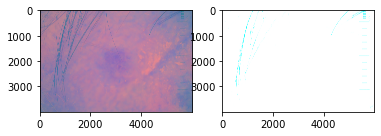

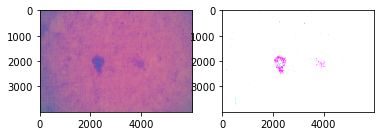

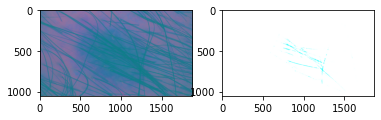

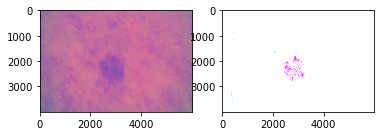

In [30]:
for i in range(len(normal)):
    im = normal[i]
    hist = normal_hists[i]
    cdf = hist.cumsum() / hist.sum()
    im_equalized = cdf[im] * 255
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(im)
    axes[1].imshow(im_equalized)
    plt.show()

Equalizer on abnormal images

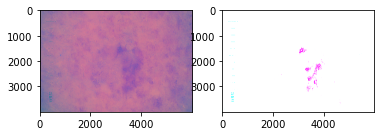

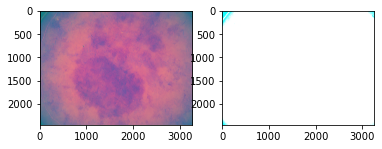

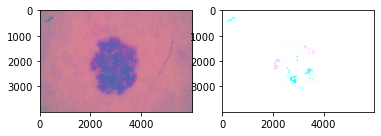

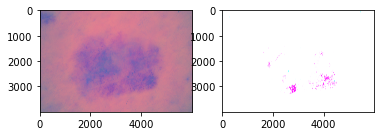

In [31]:
for i in range(len(abnormal)):
    im = abnormal[i]
    hist = abnormal_hists[i]
    cdf = hist.cumsum() / hist.sum()
    im_equalized = cdf[im] * 255
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(im)
    axes[1].imshow(im_equalized)
    plt.show()